<a href="https://colab.research.google.com/github/Yislein/Distribuidos/blob/main/Pull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inicio 1: Número de nodos infectados = 2


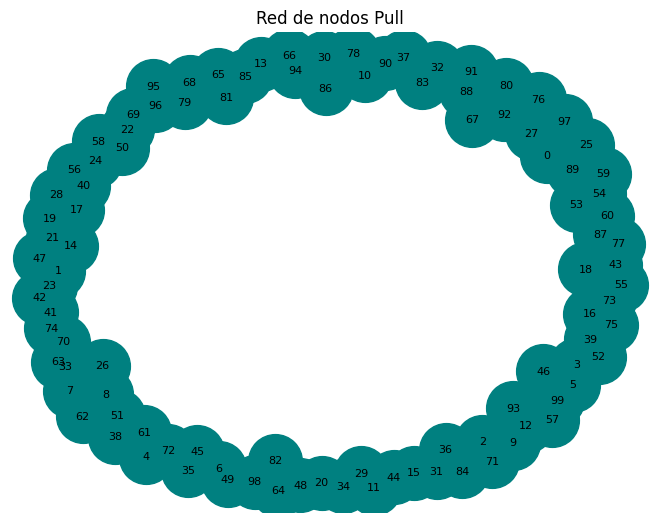

Inicio 2: Número de nodos infectados = 3


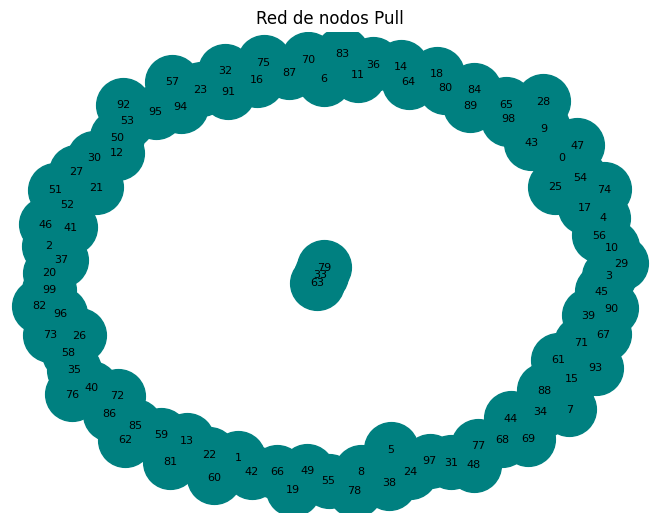

Inicio 3: Número de nodos infectados = 5


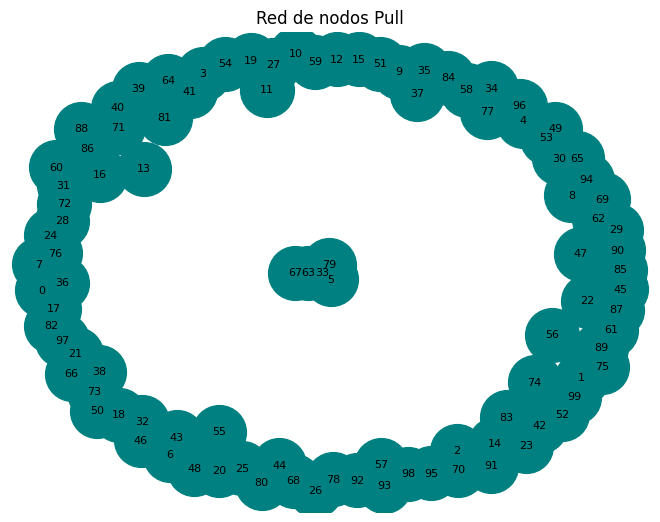

Inicio 4: Número de nodos infectados = 8


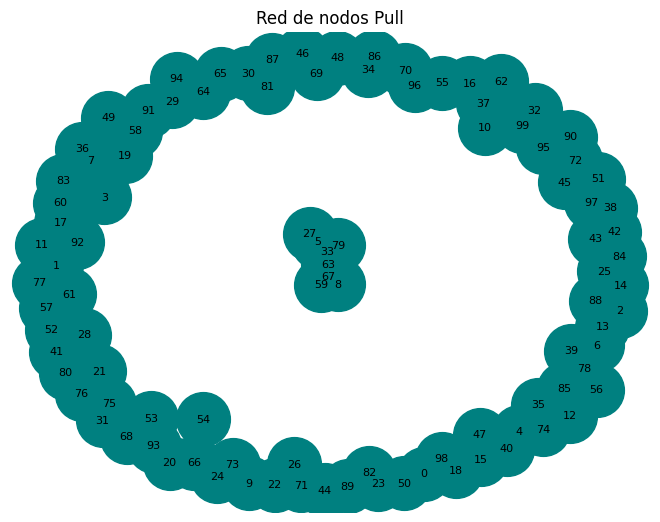

Inicio 5: Número de nodos infectados = 17


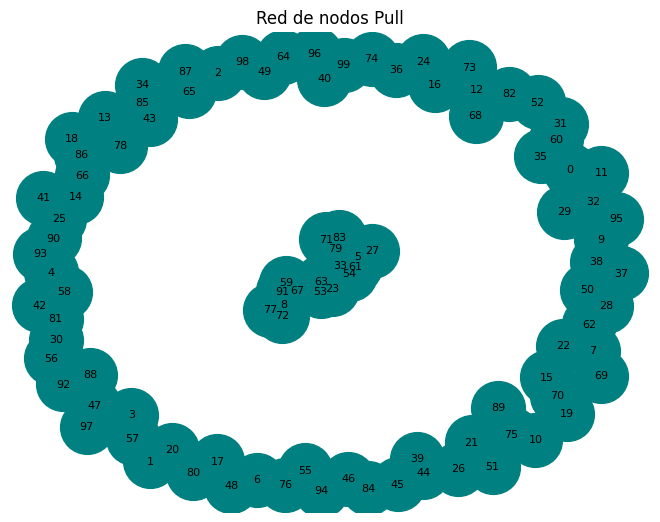

Inicio 6: Número de nodos infectados = 28


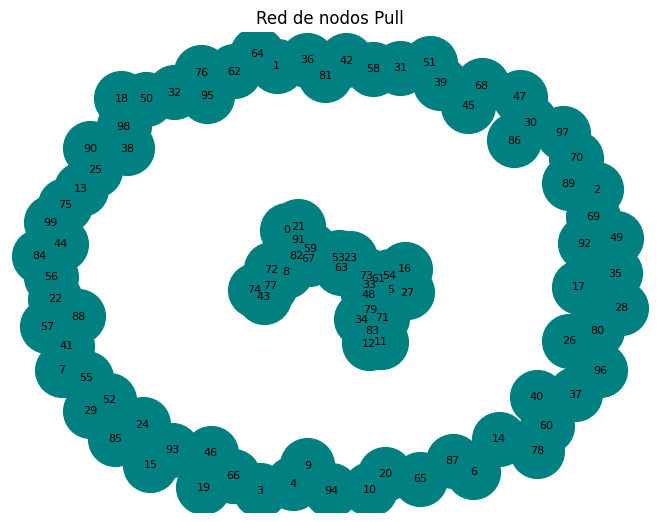

Inicio 7: Número de nodos infectados = 48


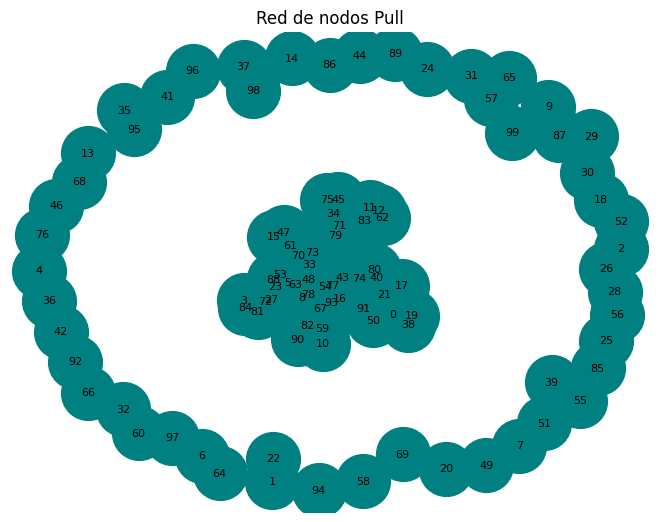

Inicio 8: Número de nodos infectados = 75


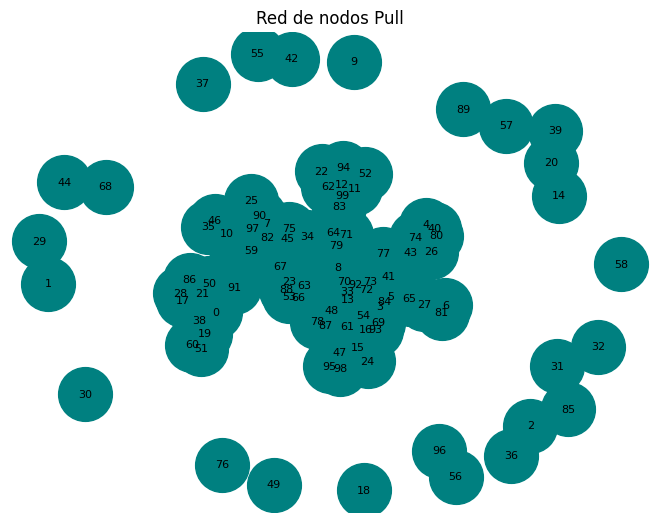

Simulación finalizada.


In [5]:
import random
import networkx as nx
import matplotlib.pyplot as plt

class Nodo:
    def __init__(self, id):
        # Inicialización de un nodo con un identificador único y no infectado
        self.id = id
        self.infectado = False

    def infectar(self):
        # Método para marcar un nodo como infectado
        self.infectado = True

    def esta_infectado(self):
        # Método para verificar si un nodo está infectado
        return self.infectado

class Red:
    def __init__(self, n):
        # Inicialización de la red con n nodos y conexión aleatoria de un nodo inicialmente infectado
        self.nodos = [Nodo(i) for i in range(n)]
        nodo_inicial = random.choice(self.nodos)
        nodo_inicial.infectar()

        # Creación del grafo utilizando NetworkX
        self.grafo = nx.Graph()
        for nodo in self.nodos:
            self.grafo.add_node(nodo.id)

    def conectar_nodos(self, nodo1, nodo2):
        # Método para conectar dos nodos en el grafo
        self.grafo.add_edge(nodo1.id, nodo2.id)

    def propagar_infeccion_pull(self):
        # Método para simular la propagación de la infección utilizando el enfoque "pull"
        # Los nodos infectados intentan infectar a sus vecinos con cierta probabilidad
        infectados = [nodo for nodo in self.nodos if nodo.esta_infectado()]
        for nodo in infectados:
            vecinos = random.sample(self.nodos, min(5, len(self.nodos)))  # Máximo 5 vecinos al azar
            for vecino in vecinos:
                if not vecino.esta_infectado():
                    probabilidad_infeccion = 0.2  # Probabilidad de infección
                    if random.random() < probabilidad_infeccion:
                        vecino.infectar()
                        self.conectar_nodos(nodo, vecino)

    def contar_infectados(self):
        # Método para contar el número de nodos infectados en la red
        return sum(1 for nodo in self.nodos if nodo.esta_infectado())

    def dibujar_red(self):
        # Método para dibujar la red utilizando NetworkX y Matplotlib
        pos = nx.spring_layout(self.grafo)
        nx.draw(self.grafo, pos, with_labels=True, node_color='teal', node_size=1500, font_size=8)
        plt.title("Red de nodos Pull")
        plt.show()

# Parámetros de la simulación
num_nodos = 100
num_pasos_simulacion = 8

# Crear la red de nodos
red = Red(num_nodos)

# Simular la propagación de la infección y mostrar el progreso
for paso in range(num_pasos_simulacion):
    red.propagar_infeccion_pull()
    infectados = red.contar_infectados()
    print(f"Inicio {paso + 1}: Número de nodos infectados = {infectados}")

    # Dibujar la red en cada paso
    red.dibujar_red()

print("Simulación finalizada.")
